In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("../data/logfile-network-v3.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,id,type,role,level,bandwidth,total_used_bandwidth,traffic_history,ports,duration,active_duration,power_per_port,low_power,high_power,is_active,Unnamed: 16
0,0,Datacenter_1,0,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"449,True,4.0,113,0,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
1,0,Datacenter_1,1,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"450,True,4.0,113,1,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
2,0,Datacenter_1,2,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"451,True,4.0,113,2,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
3,0,Datacenter_1,3,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"452,True,4.0,113,3,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN
4,0,Datacenter_1,4,switch,access switch,0,5000,4000.0,1000.0:1000.0:1000.0:1000.0:,"453,True,4.0,114,4,1000,4000.0,1000.0-1000.0-1...",449.0,0.8,15.4,70,71,True,NaN


#### Access switches

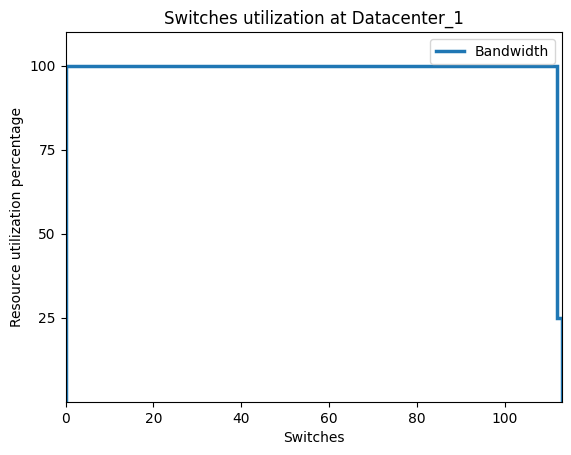

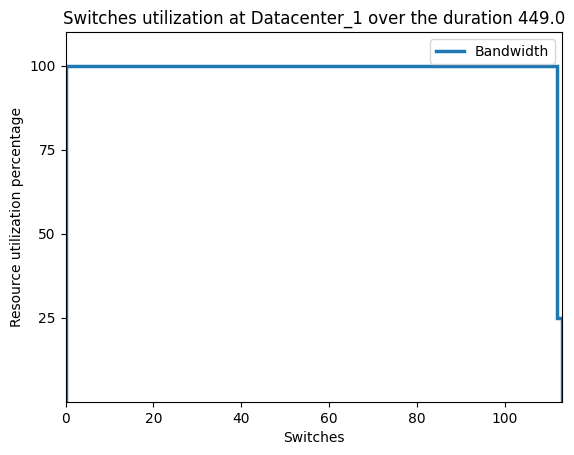

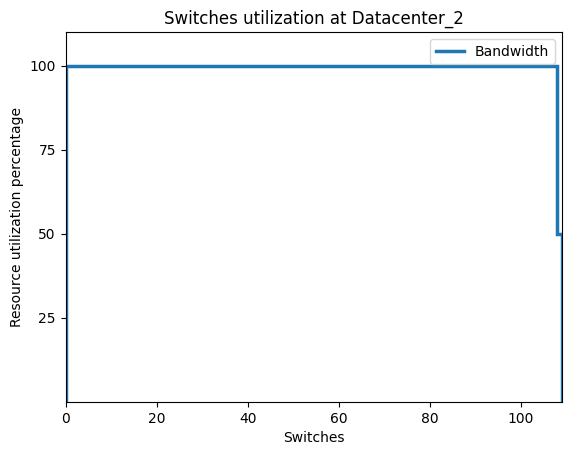

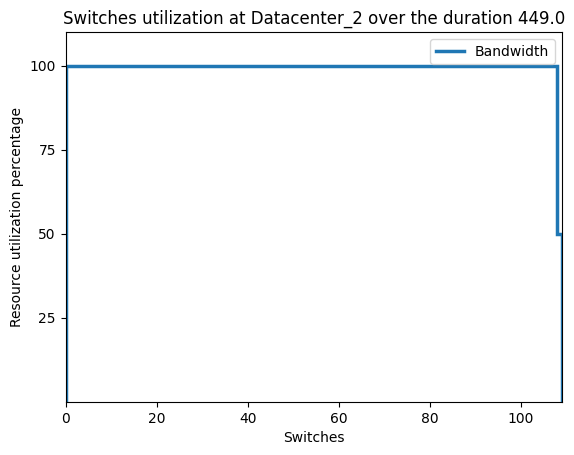

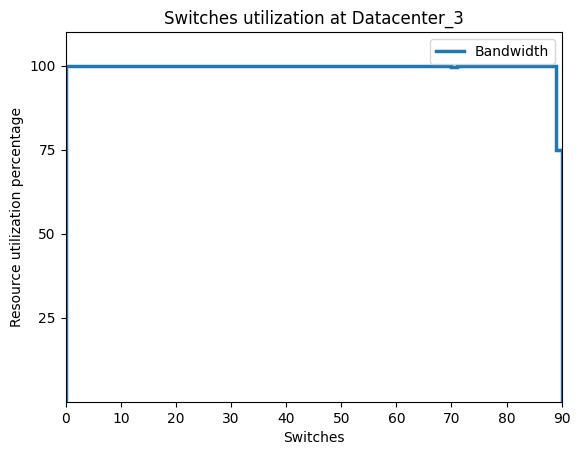

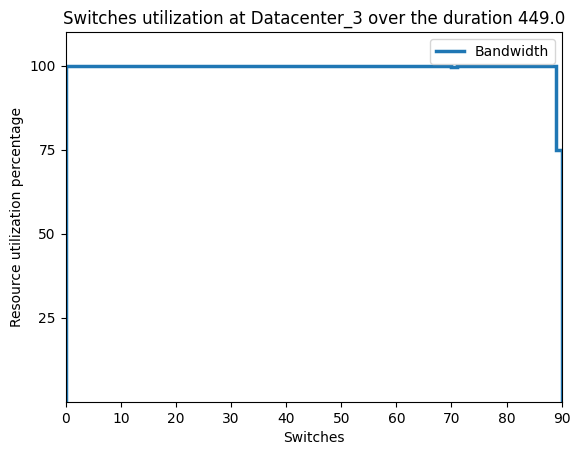

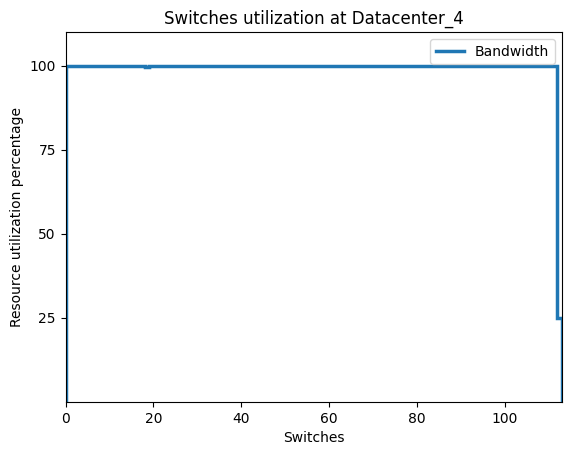

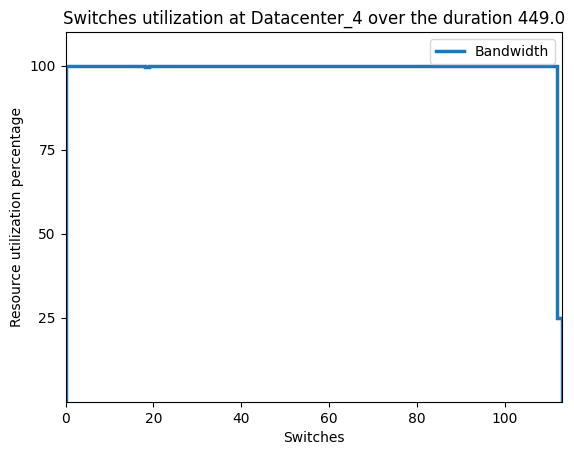

In [8]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[dataset['role'] == "access switch"]['total_used_bandwidth'])
for i in range(len(labels)):
    # max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")]['total_used_bandwidth'])
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()

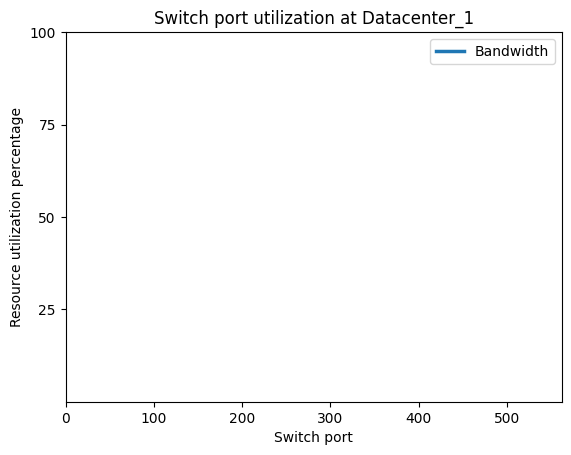

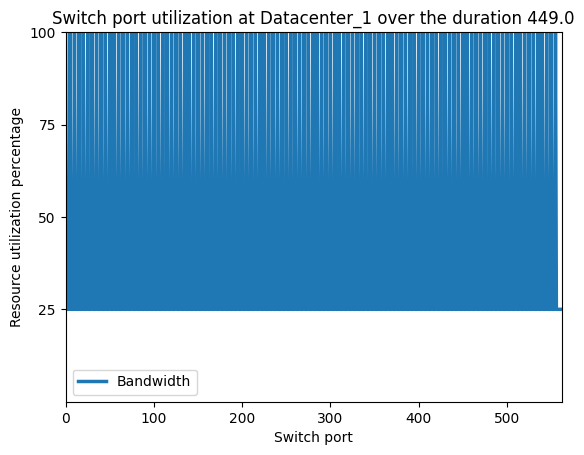

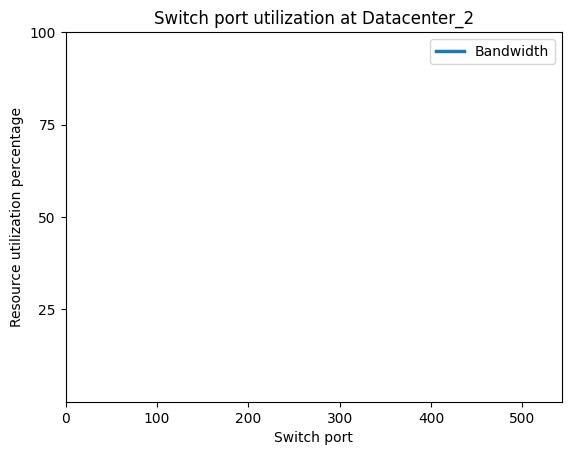

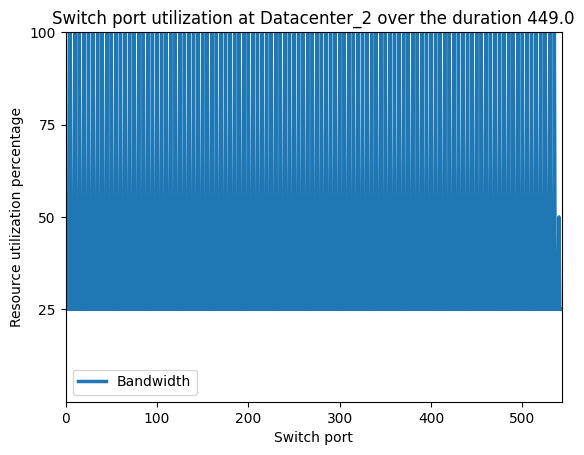

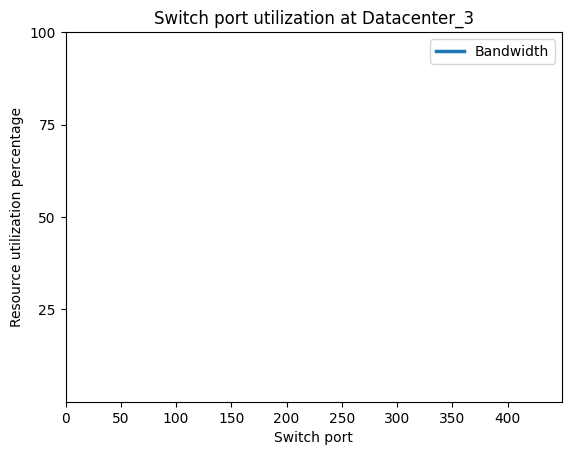

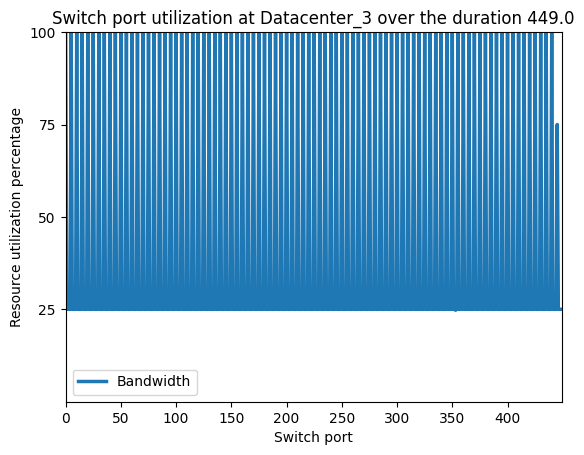

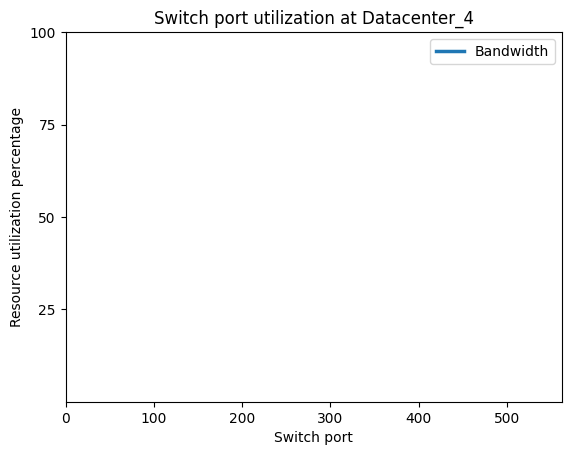

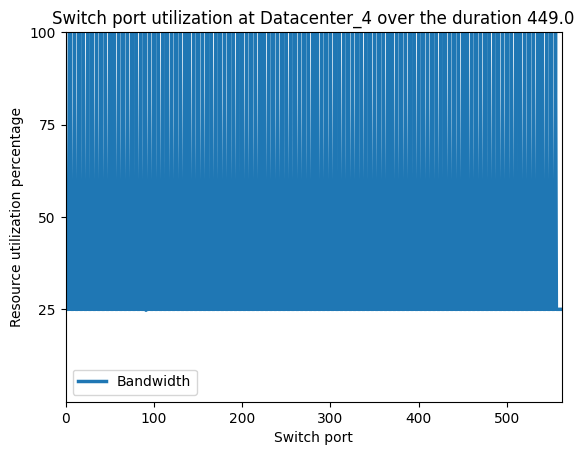

In [9]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "access switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "access switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
    
    fig, ax = plt.subplots()
    ax.plot(((switch_port_bandwidth_utilization / max_switch_port_bandwidth_utilization) * dataset['duration'][0]) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,100), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()

#### Distribution switches

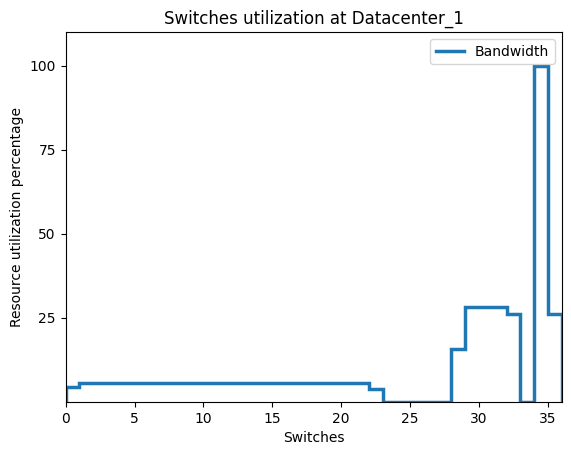

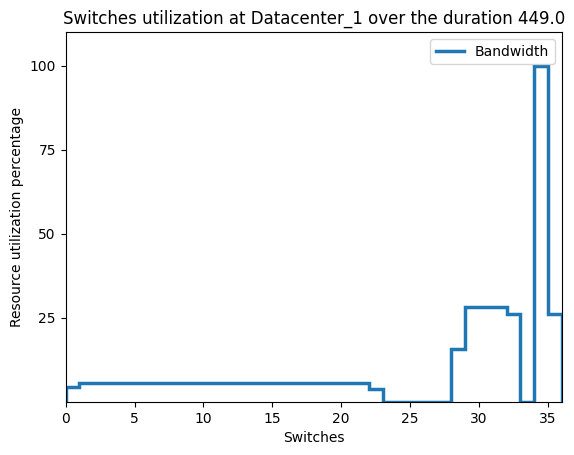

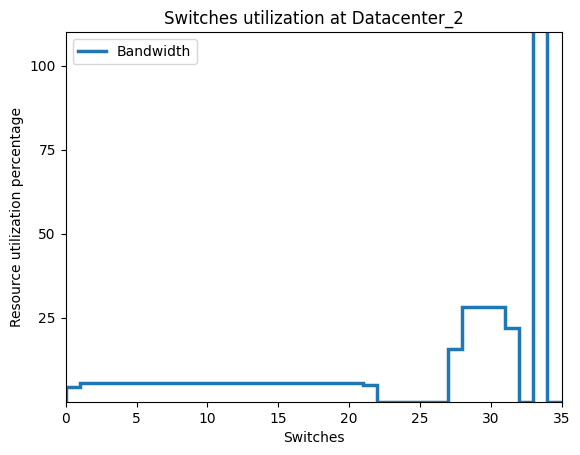

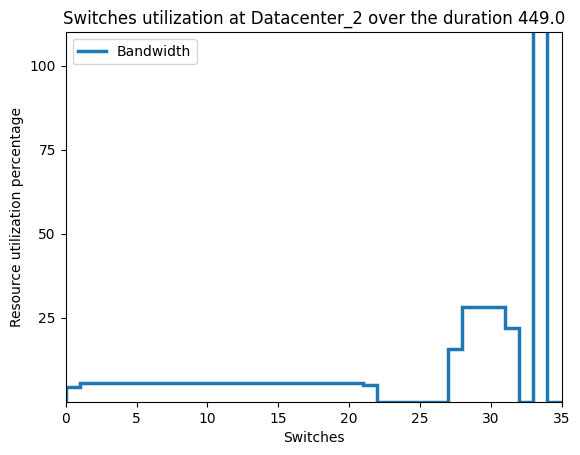

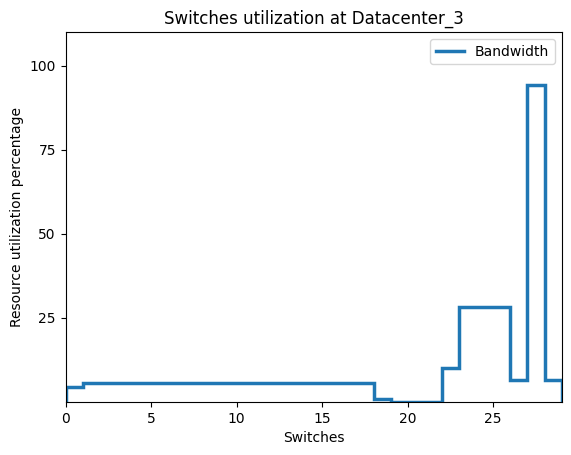

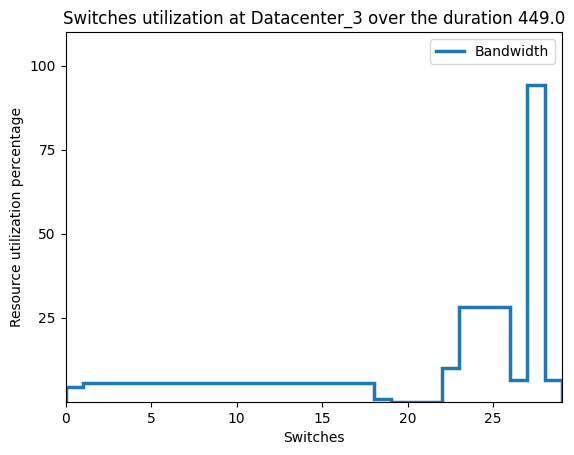

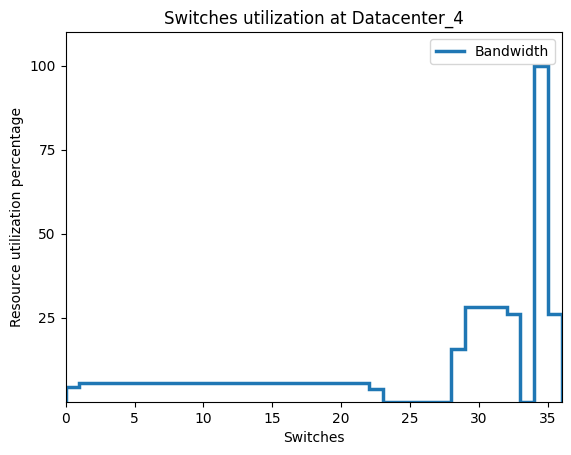

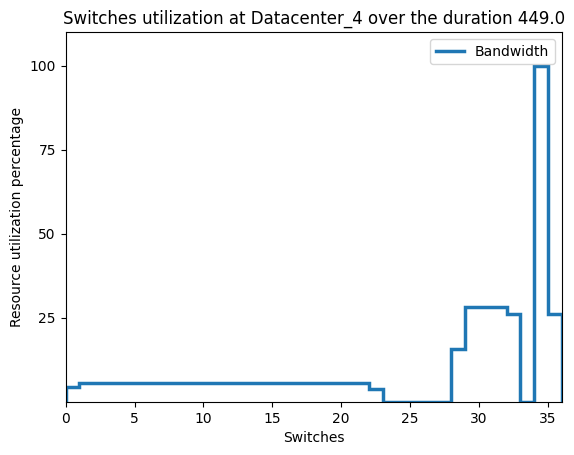

In [10]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")]['total_used_bandwidth'])
for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()

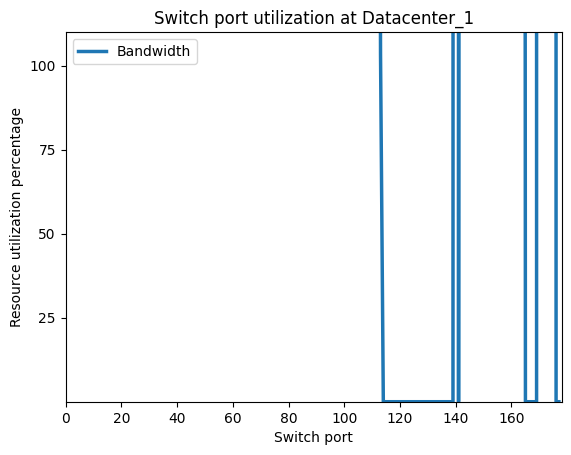

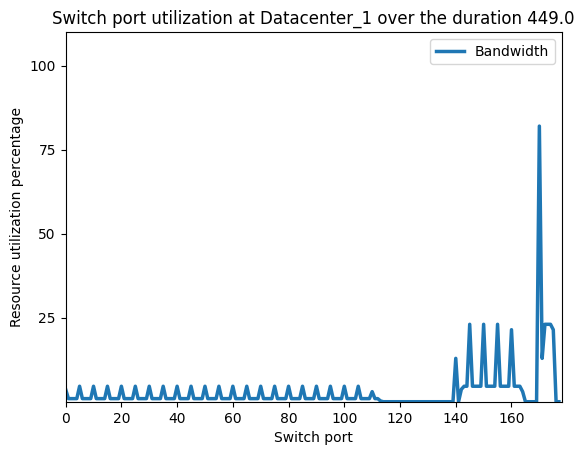

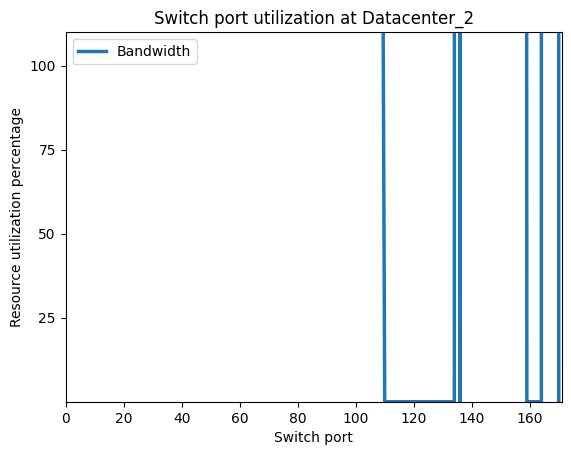

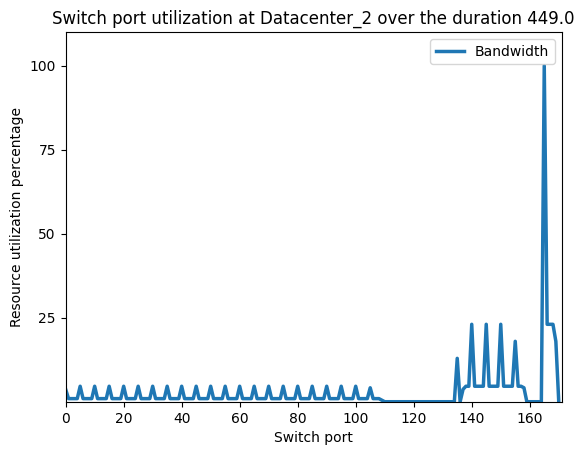

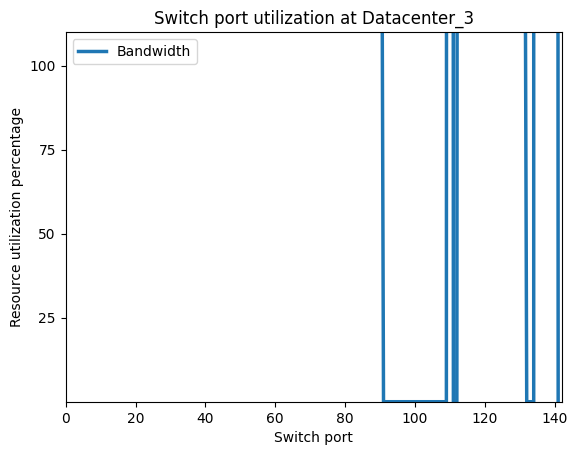

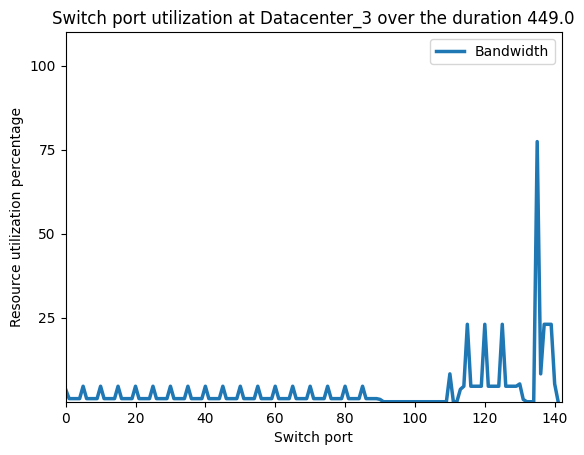

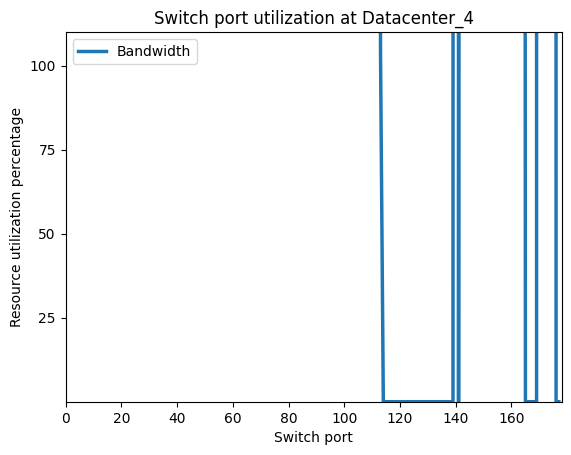

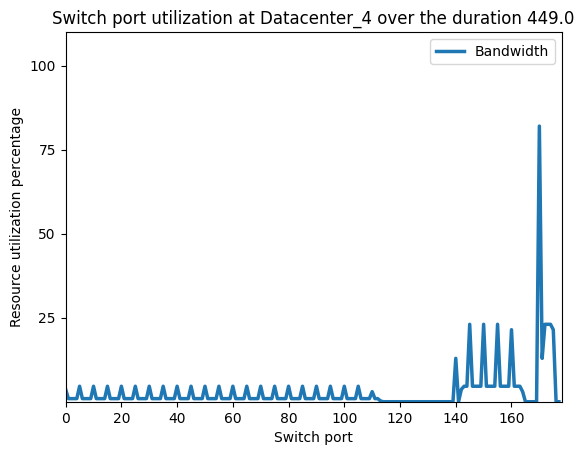

In [11]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "distribution switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "distribution switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
    
    fig, ax = plt.subplots()
    ax.plot(((switch_port_bandwidth_utilization / max_switch_port_bandwidth_utilization) * dataset['duration'][0]) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()

#### Core switches

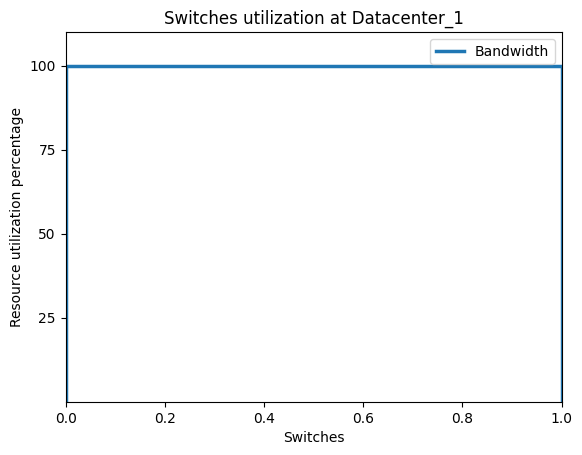

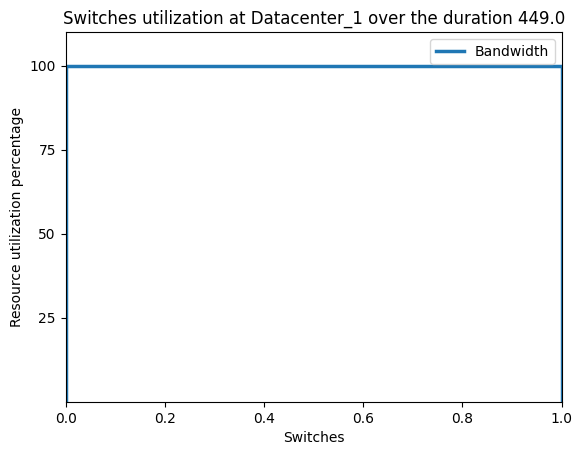

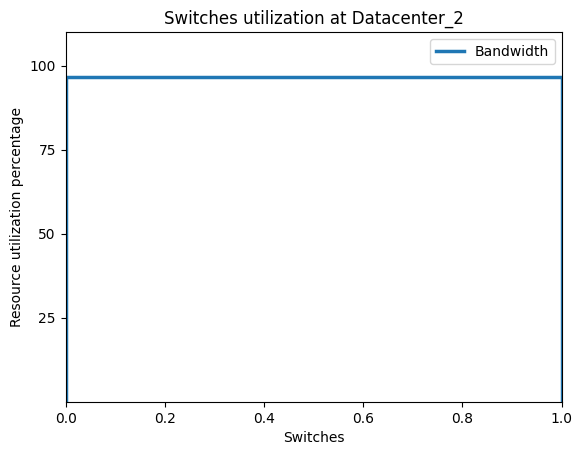

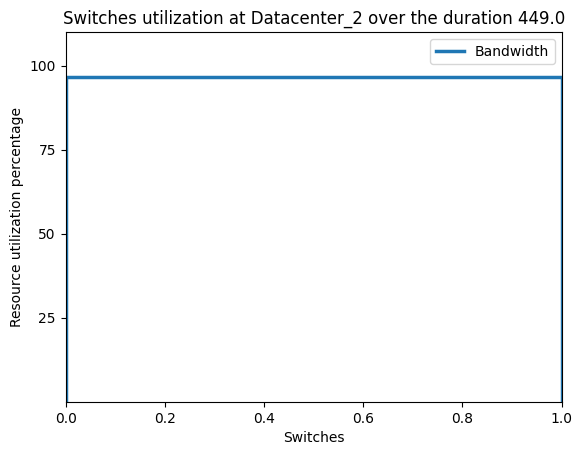

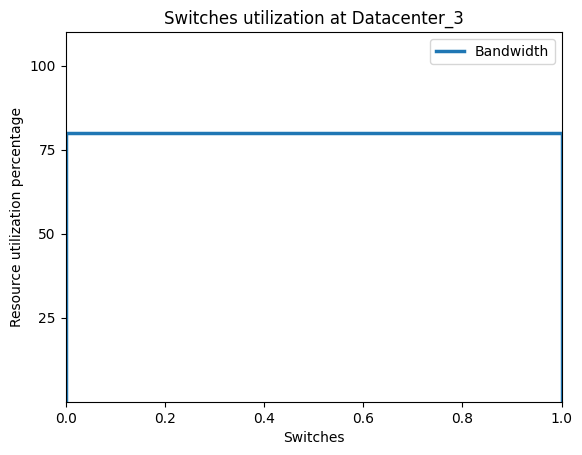

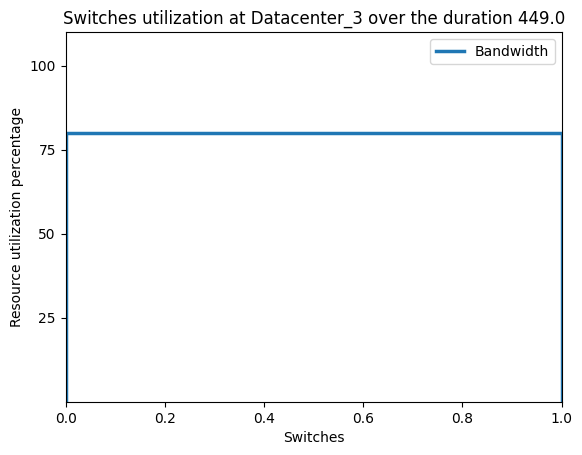

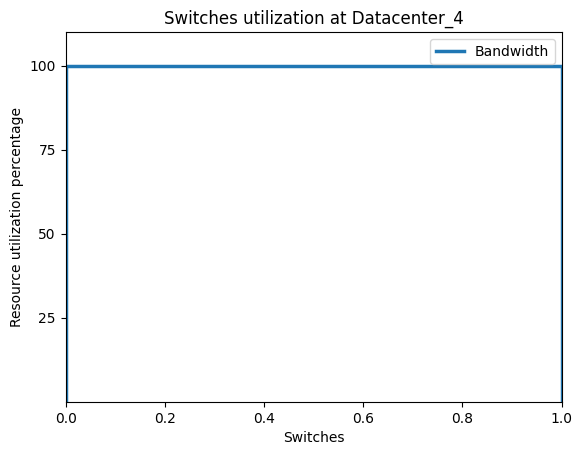

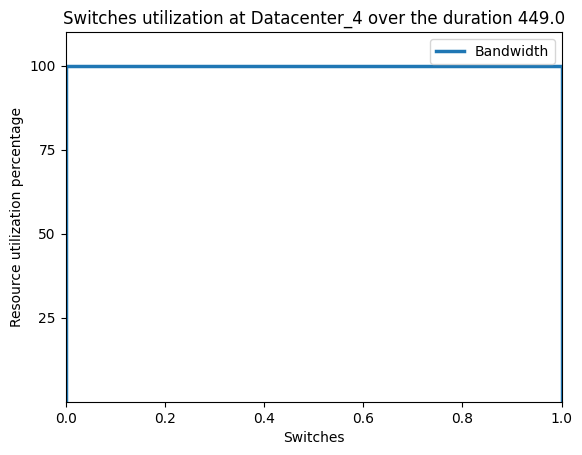

In [12]:
labels = np.unique(dataset['datacenter_name'])
max_switch_bandwidth_utilization = max(dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")]['total_used_bandwidth'])
for i in range(len(labels)):
    switch_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        switch_bandwidth_utilization = np.append(switch_bandwidth_utilization, sample['total_used_bandwidth'])
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_bandwidth_utilization * dataset['duration'][0])/(max_switch_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_bandwidth_utilization/max_switch_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switches")
    plt.title(f"Switches utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()

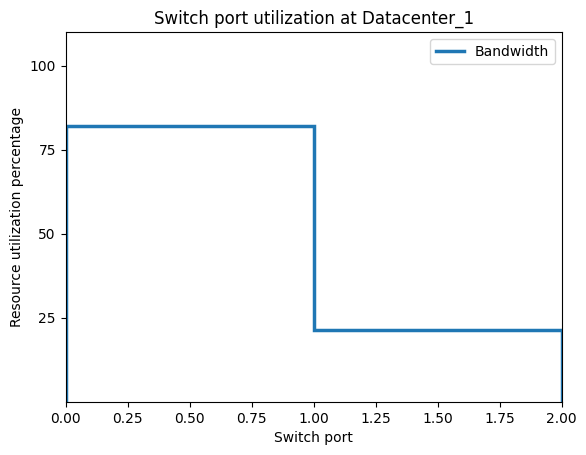

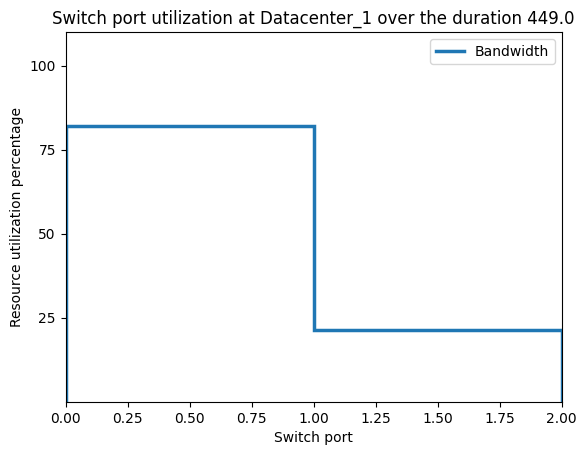

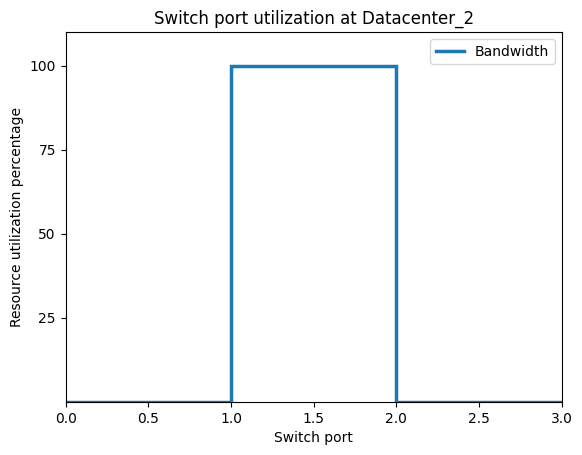

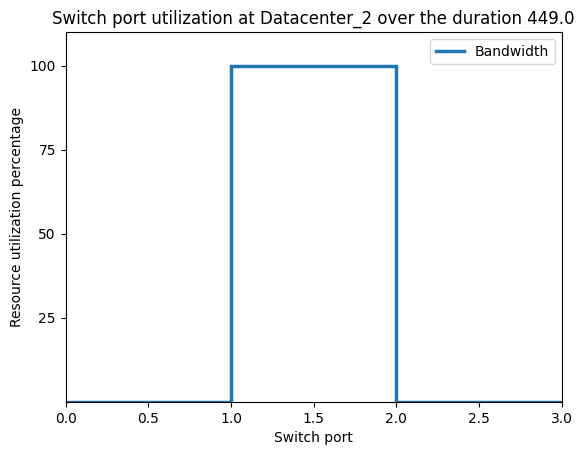

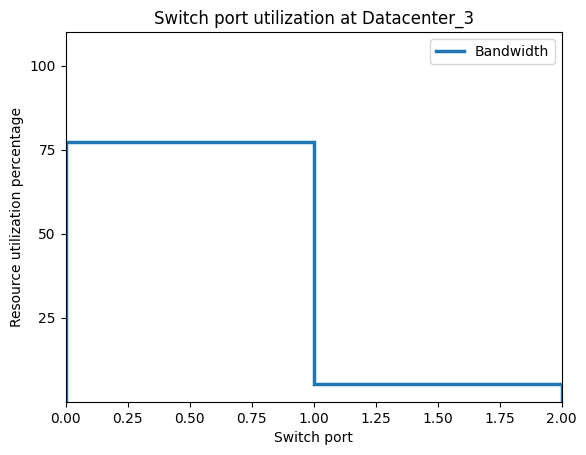

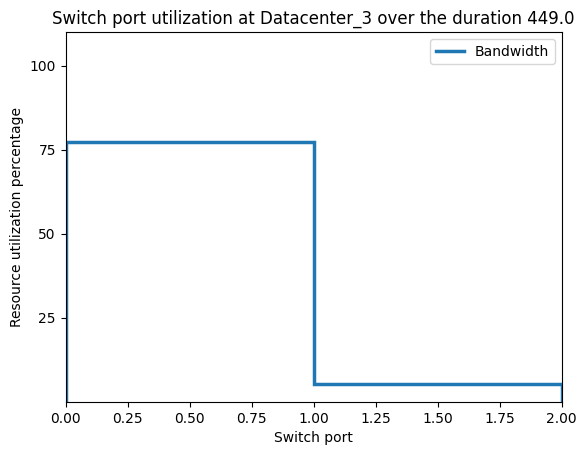

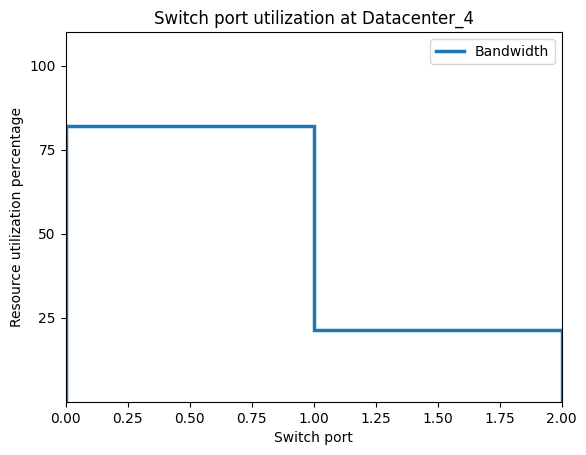

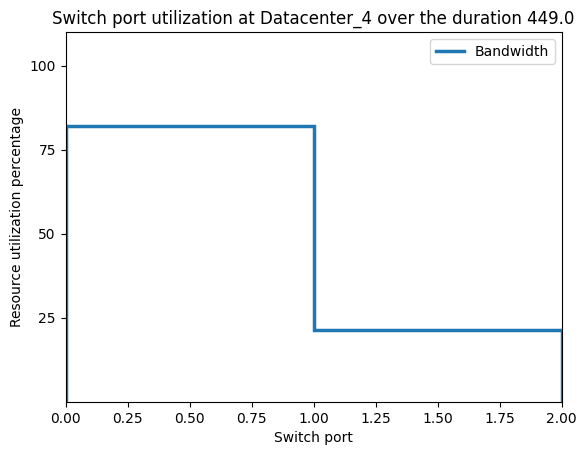

In [13]:
labels = np.unique(dataset['datacenter_name'])
max_switch_port_bandwidth_utilization = 0
for index, sample in dataset[dataset['role'] == "core switch"].iterrows():
    if pd.notna(sample['ports']):
        ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth
        for port in ports:
            if port != "":
                port_info = port.split(",")
                if max_switch_port_bandwidth_utilization < float(port_info[6]):
                    max_switch_port_bandwidth_utilization = float(port_info[6])

for i in range(len(labels)):
    switch_port_bandwidth_utilization = np.array([])
    # switch_active_duration = np.array([])
    # switch_inactive_duration = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['role'] == "core switch")].iterrows():
        
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":")
            for port in ports:
                if port != "":
                    port_info = port.split(",")
                    switch_port_bandwidth_utilization = np.append(switch_port_bandwidth_utilization, float(port_info[6]))
    
    fig, ax = plt.subplots()
    ax.stairs(((switch_port_bandwidth_utilization * dataset['duration'][0]) / (max_switch_port_bandwidth_utilization * dataset['duration'][0])) * 100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs((switch_port_bandwidth_utilization/max_switch_port_bandwidth_utilization)*100, linewidth=2.5, label="Bandwidth")
    ax.set(xlim=(0, len(switch_port_bandwidth_utilization)), ylim=(0,110), yticks=np.array([25,50,75,100]))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Switch port")
    plt.title(f"Switch port utilization at {sample['datacenter_name']} over the duration {dataset['duration'][0]}")
    plt.legend()
    plt.show()